# LAB 7: Write a program for lemmatizing words Using WordNet

## Tushar Kumar
## 22122056
## 3MSCDSA

- Visualize yourself analyzing content from the public blog.
- Apply the program to lemmatize words in a sample blog post.
- Evaluate how lemmatization aids in identifying key concepts of the specified blog.

### CREATING THE BLOG POST

In [13]:
blog_post = """
Title: "Lionel Messi - The Greatest of All Time!"

Lionel Messi, often hailed as one of the greatest footballers of all time, has left an indelible mark on the beautiful game. Born on June 24, 1987, in Rosario, Argentina, Messi displayed exceptional talent from an early age. He joined the famed La Masia academy at FC Barcelona, the club where he would rise to stardom.

Messi's remarkable career is defined by his unrivaled skill, speed, and vision on the field. He has an extraordinary ability to dribble past defenders with ease and an eye for goal that is simply unmatched. Messi's left foot is like a magic wand, weaving spells on the pitch, leaving spectators and opponents in awe.
"""

### TOKENIZATION

In [14]:
# importing all neccessary libraries
import nltk
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords   
import string

In [15]:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())

    # Remove punctuation and numbers
    tokens = [word for word in tokens if word.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

preprocessed_tokens = preprocess_text(blog_post)

In [19]:
print(preprocessed_tokens)

['title', 'lionel', 'messi', 'greatest', 'time', 'lionel', 'messi', 'often', 'hailed', 'one', 'greatest', 'footballers', 'time', 'left', 'indelible', 'mark', 'beautiful', 'game', 'born', 'june', 'rosario', 'argentina', 'messi', 'displayed', 'exceptional', 'talent', 'early', 'age', 'joined', 'famed', 'la', 'masia', 'academy', 'fc', 'barcelona', 'club', 'would', 'rise', 'stardom', 'messi', 'remarkable', 'career', 'defined', 'unrivaled', 'skill', 'speed', 'vision', 'field', 'extraordinary', 'ability', 'dribble', 'past', 'defenders', 'ease', 'eye', 'goal', 'simply', 'unmatched', 'messi', 'left', 'foot', 'like', 'magic', 'wand', 'weaving', 'spells', 'pitch', 'leaving', 'spectators', 'opponents', 'awe']


## WORD FREQUENCY COUNTER

In [16]:
from collections import Counter

word_freq = Counter(preprocessed_tokens) 

In [17]:
print(word_freq)

Counter({'messi': 5, 'lionel': 2, 'greatest': 2, 'time': 2, 'left': 2, 'title': 1, 'often': 1, 'hailed': 1, 'one': 1, 'footballers': 1, 'indelible': 1, 'mark': 1, 'beautiful': 1, 'game': 1, 'born': 1, 'june': 1, 'rosario': 1, 'argentina': 1, 'displayed': 1, 'exceptional': 1, 'talent': 1, 'early': 1, 'age': 1, 'joined': 1, 'famed': 1, 'la': 1, 'masia': 1, 'academy': 1, 'fc': 1, 'barcelona': 1, 'club': 1, 'would': 1, 'rise': 1, 'stardom': 1, 'remarkable': 1, 'career': 1, 'defined': 1, 'unrivaled': 1, 'skill': 1, 'speed': 1, 'vision': 1, 'field': 1, 'extraordinary': 1, 'ability': 1, 'dribble': 1, 'past': 1, 'defenders': 1, 'ease': 1, 'eye': 1, 'goal': 1, 'simply': 1, 'unmatched': 1, 'foot': 1, 'like': 1, 'magic': 1, 'wand': 1, 'weaving': 1, 'spells': 1, 'pitch': 1, 'leaving': 1, 'spectators': 1, 'opponents': 1, 'awe': 1})


In [40]:
df2 = pd.DataFrame({'Word_Frequency':word_freq})
df2

,Word_Frequency
ability,1
academy,1
age,1
argentina,1
awe,1
...,...
unrivaled,1
vision,1
wand,1
weaving,1


## VISUALISATIONS

__BAR PLOT__

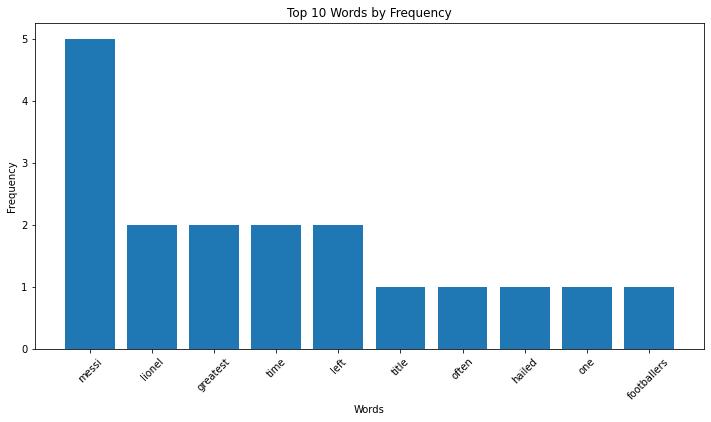

In [23]:
# Plotting word frequencies

import matplotlib.pyplot as plt

def plot_word_frequencies(word_freq):
    common_words = word_freq.most_common(10)  # Display the top 10 words

    words, frequencies = zip(*common_words)

    plt.figure(figsize=(12, 6))
    plt.bar(words, frequencies)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top 10 Words by Frequency')
    plt.xticks(rotation=45)
    plt.show()

plot_word_frequencies(word_freq)

__WORD CLOUD__

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [42]:
# Join the tokens into a string for word cloud generation
text = ' '.join(preprocessed_tokens)

In [43]:
# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

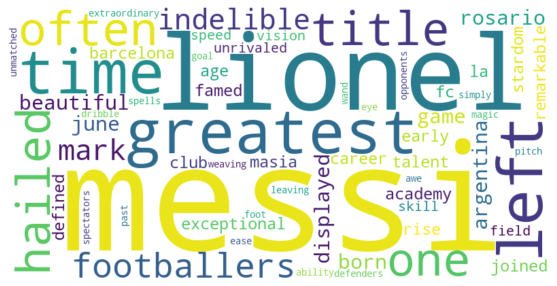

In [44]:
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

__HEAT MAP__

In [45]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
# Create a co-occurrence matrix
unique_tokens = set(preprocessed_tokens)
co_occurrence_matrix = np.zeros((len(unique_tokens), len(unique_tokens)))

In [50]:
for i, token1 in enumerate(unique_tokens):
    for j, token2 in enumerate(unique_tokens):
        co_occurrence_matrix[i, j] = sum(1 for k in range(len(preprocessed_tokens) - 1) 
                                         if preprocessed_tokens[k] == token1 and preprocessed_tokens[k + 1] == token2)

In [51]:
# Normalize the co-occurrence matrix (optional)
co_occurrence_matrix = co_occurrence_matrix / co_occurrence_matrix.sum(axis=1, keepdims=True)

C:\Users\tkuma\AppData\Local\Temp\ipykernel_5812\3874919922.py:2: RuntimeWarning: invalid value encountered in true_divide
  co_occurrence_matrix = co_occurrence_matrix / co_occurrence_matrix.sum(axis=1, keepdims=True)


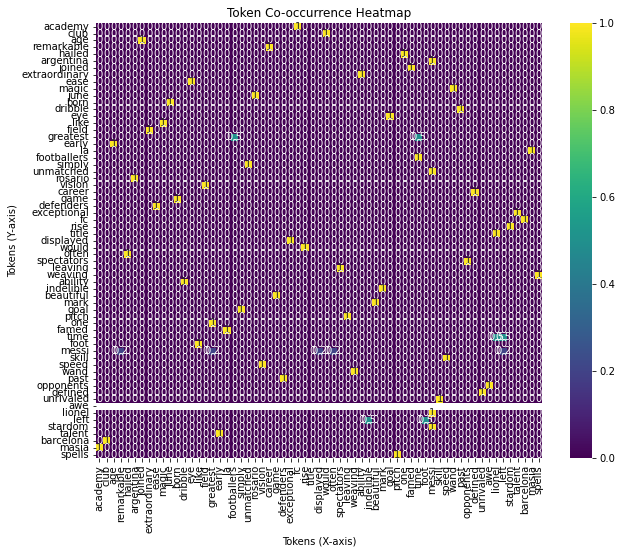

In [52]:
# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence_matrix, annot=True, xticklabels=unique_tokens, yticklabels=unique_tokens, cmap='viridis')

# Set labels and title
plt.xlabel('Tokens (X-axis)')
plt.ylabel('Tokens (Y-axis)')
plt.title('Token Co-occurrence Heatmap')

plt.show()

# LEMMATIZATION

In [56]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tkuma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tkuma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [57]:
lemmatized_post = lemmatize_text(blog_post)
print(lemmatized_post)

Title : `` Lionel Messi - The Greatest of All Time ! '' Lionel Messi , often hailed a one of the greatest footballer of all time , ha left an indelible mark on the beautiful game . Born on June 24 , 1987 , in Rosario , Argentina , Messi displayed exceptional talent from an early age . He joined the famed La Masia academy at FC Barcelona , the club where he would rise to stardom . Messi 's remarkable career is defined by his unrivaled skill , speed , and vision on the field . He ha an extraordinary ability to dribble past defender with ease and an eye for goal that is simply unmatched . Messi 's left foot is like a magic wand , weaving spell on the pitch , leaving spectator and opponent in awe .
